# PFDA-Project-2019

## Programming for Data Analysis Project 2019 - Child Birth

### Simulating Data


### Child Birth Ireland

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sbn

Below code will be used so that the number of Irish children born can be simulated up to any positive integer, code to ensure number entered into variable is a positive integer adapted from [here.](https://www.quora.com/How-can-I-make-sure-the-user-inputs-a-positive-integer-in-Python)

In [2]:
# code below adapted from above link which prevents numbers less than 0 and non numeric characters being entered.

while True:
	try:
		number_births = int(input("Please enter the number of Irish births you would like to simulate: "))
		assert(number_births>0)
		break
	except:
		print("The number of births must be a positive integer, please try again.")

Please enter the number of Irish births you would like to simulate: 200


### Create Gender Data
After some initial research my simulation will focus on first time parents becasue as the birth order increases this can have an affect on the gender ratio of the child being born as can be seen [here.](https://ourworldindata.org/gender-ratio) As the birth order increases there is a bias in favour of females being born, it may be possible to build this variation into my simulation however further research is required first.

The paper related to the above website on gender ratios can be found [here](https://www.pnas.org/content/116/19/9303), for the generation of the gender data used to validate there sample the authors used a normal distribution. This will also be the distribution I will use in the generation of the gender of the children born in my simulaiton.

In [3]:
gender_number = np.random.normal(loc=0.0, scale=1.0, size=number_births)

After generating the random numbers that I will use as the basis for determining the gender of the children in my simulation I plotted the data in a histogram to confirm the normal distribution of the data. I will create a text column that is linked to this number whereby numbers greater than 0 will be male and less than will be females.

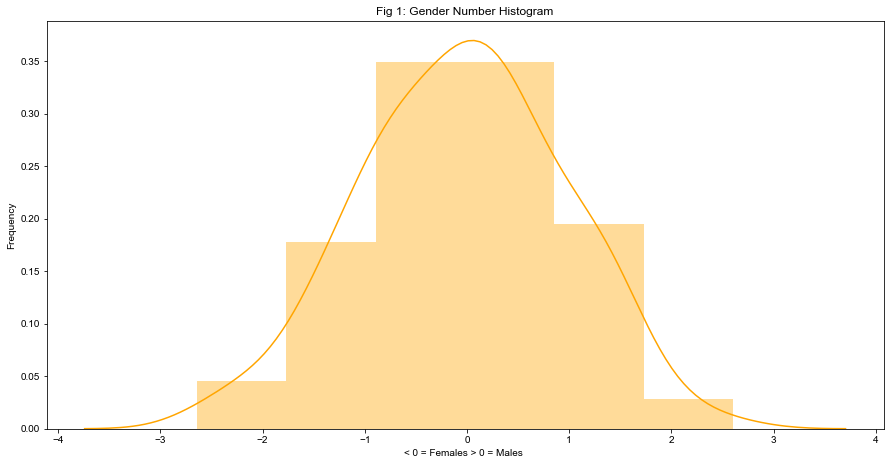

In [4]:
plt.rcParams["figure.figsize"] = (15,7.5)

sbn.distplot(gender_number, color='orange',  bins=6)
sbn.set_style("darkgrid")
plt.title('Fig 1: Gender Number Histogram')
plt.xlabel('< 0 = Females > 0 = Males ')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Convert from numpy array to pandas dataframe, this dataframe will house the data for my final submission

birth_data = pd.DataFrame(gender_number)
birth_data.columns = ['gender_number']

Code to create text of gender based on values gender number column adapted from [here.](https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column)

In [6]:
birth_data['gender_text'] = np.where(birth_data['gender_number']>0, 'Male', 'Female')
print(birth_data)

     gender_number gender_text
0        -0.627249      Female
1         0.948149        Male
2         0.437449        Male
3         0.228273        Male
4         0.315317        Male
5         0.448210        Male
6         1.326788        Male
7         0.750548        Male
8        -0.139764      Female
9         0.051801        Male
10       -1.030319      Female
11        0.390453        Male
12        0.284961        Male
13        0.204848        Male
14       -1.473185      Female
15        0.588651        Male
16        0.802300        Male
17        1.403262        Male
18       -0.389810      Female
19       -0.399443      Female
20       -0.984899      Female
21       -2.094645      Female
22        0.161156        Male
23        0.553659        Male
24       -0.662607      Female
25        1.390254        Male
26       -0.137864      Female
27       -0.961734      Female
28        0.712241        Male
29        1.643982        Male
..             ...         ...
170     

### Create Weight Data

The study completed in the following [link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2927479/) sets out to model the distributions of birth weights in children. The author goes on to explain that different components of data can have an influence on the shape of the distributions such as smoking preference and ethnicity to name two.

For the purpose of this simulation as highlighted by the author of the above study I will be using a noraml distribution as thre are far too many components to account for all instances but I will use a different mean for either genders in the generation of the data.

Average weights of Irish newborns taken from [this](https://www.independent.ie/irish-news/big-is-beautiful-as-experts-dispel-sumo-baby-myth-26454311.html) article by the Irish Independent which references 2017 CSO figures and which I belive to be a reliable source of data.

In [9]:
# Male Mean = 7lb 13oz/3,543g
# Female Mean = 7lb 8oz/3,402g

birth_data['birth_weight'] = np.where(birth_data['gender_number']>0, np.random.normal(loc=3543, size=None), np.random.normal(loc=3402, scale=1.0, size=None))

In [10]:
print(birth_data)

     gender_number gender_text  birth_weight
0        -0.627249      Female   3401.315142
1         0.948149        Male   3542.091087
2         0.437449        Male   3542.091087
3         0.228273        Male   3542.091087
4         0.315317        Male   3542.091087
5         0.448210        Male   3542.091087
6         1.326788        Male   3542.091087
7         0.750548        Male   3542.091087
8        -0.139764      Female   3401.315142
9         0.051801        Male   3542.091087
10       -1.030319      Female   3401.315142
11        0.390453        Male   3542.091087
12        0.284961        Male   3542.091087
13        0.204848        Male   3542.091087
14       -1.473185      Female   3401.315142
15        0.588651        Male   3542.091087
16        0.802300        Male   3542.091087
17        1.403262        Male   3542.091087
18       -0.389810      Female   3401.315142
19       -0.399443      Female   3401.315142
20       -0.984899      Female   3401.315142
21       -